## 1. Lectura y limpieza de datos
Se leen los archivos de cada carrera y se combinan los textos relevantes para el análisis.

In [1]:
import os
import pandas as pd
ruta_base = 'todas_las_plataformas'
columnas_texto = ['skills', 'description']
corpus_carreras = {}
for subcarpeta in os.listdir(ruta_base):
    ruta_subcarpeta = os.path.join(ruta_base, subcarpeta)
    archivo_objetivo = os.path.join(ruta_subcarpeta, f'{subcarpeta}_Merged.csv')
    if os.path.isfile(archivo_objetivo):
        try:
            df = pd.read_csv(archivo_objetivo, dtype=str)
        except Exception as e:
            print(f'Error leyendo {archivo_objetivo}: {e}')
            continue
        textos = []
        for col in columnas_texto:
            if col in df.columns:
                textos.extend(df[col].dropna().tolist())
        corpus_carreras[subcarpeta] = ' '.join(textos)
df_ejemplo = pd.DataFrame({'carrera': list(corpus_carreras.keys()), 'texto': list(corpus_carreras.values())})
df_ejemplo

,carrera,texto
0,Administración_de_Empresas,"Servicio al cliente, Ventas, Gestión de efecti..."
1,Agroindustria,Cualquier desviación debe comunicarse al super...
2,Ciencia_de_Datos,Más de 3 años de experiencia en desarrollo de ...
3,Computación,"En general, estamos buscando un miembro del eq..."
4,Economía,"Sobresalir, Inteligencia de negocios, Power Bi..."
5,Electricidad,2 anos de experiencia minima como montador (pr...
6,Electrónica_y_Automatización,El candidato ideal tendrá experiencia en trata...
7,Física,Licenciatura y mínimo 9 años de experiencia re...
8,Geología,Grado avanzado (maestría o doctorado) en geolo...
9,Ingeniería_Ambiental,"Una licenciatura en un campo científico, de in..."


## 2. Definición de la whitelist de habilidades técnicas
Se crea una lista de habilidades técnicas relevantes para todas las carreras.

In [2]:
# ... Copiar aquí la whitelist del cuaderno original ...
whitelist = {
    # Administración de Empresas
    'excel', 'power bi', 'erp', 'project management', 'sql', 'contabilidad', 'finanzas', 'marketing', 'gestión de recursos humanos', 'análisis financiero', 'auditoría', 'planificación estratégica', 'costos', 'presupuestos', 'negociación', 'comercio exterior', 'logística', 'supply chain', 'crm', 'ventas', 'administración de empresas',
    # Agroindustria
    'normas iso', 'producción', 'control de plagas', 'seguridad alimentaria', 'buenas prácticas agrícolas', 'procesamiento de alimentos', 'agronomía', 'fertilización', 'riego', 'postcosecha', 'biotecnología', 'fitopatología', 'agroindustria', 'trazabilidad', 'certificación orgánica',
    # Ciencia de Datos
    'python', 'machine learning', 'data analysis', 'sql', 'r', 'big data', 'visualización de datos', 'estadística', 'deep learning', 'scikit-learn', 'pandas', 'numpy', 'matplotlib', 'data mining', 'análisis predictivo', 'regresión', 'clasificación', 'clustering', 'etl', 'modelado de datos', 'inteligencia artificial', 'análisis exploratorio', 'data science',
    # Computación
    'java', 'c++', 'python', 'linux', 'git', 'algoritmos', 'estructura de datos', 'sistemas operativos', 'redes', 'seguridad informática', 'desarrollo web', 'html', 'css', 'javascript', 'php', 'sql', 'c#', 'arquitectura de computadoras', 'compiladores', 'base de datos', 'ingeniería de software', 'testing', 'uml', 'scrum', 'devops',
    # Economía
    'econometría', 'estadística', 'finanzas', 'análisis de datos', 'excel', 'microeconomía', 'macroeconomía', 'modelos econométricos', 'análisis financiero', 'gestión de riesgos', 'mercados financieros', 'política económica', 'economía internacional', 'teoría de juegos', 'pronósticos', 'costos', 'presupuestos',
    # Electricidad
    'circuitos', 'electrónica', 'automatización', 'plc', 'motores eléctricos', 'instalaciones eléctricas', 'protecciones eléctricas', 'energía renovable', 'diseño eléctrico', 'subestaciones', 'mediciones eléctricas', 'generación eléctrica', 'distribución eléctrica', 'transformadores',
    # Electrónica y Automatización
    'plc', 'sensores', 'microcontroladores', 'automatización', 'circuitos', 'arduino', 'raspberry pi', 'robotica', 'sistemas embebidos', 'instrumentación', 'control automático', 'electrónica digital', 'electrónica analógica', 'scada', 'diseño de pcb', 'fpga', 'vhdl', 'proteus',
    # Física
    'simulación', 'matlab', 'python', 'análisis de datos', 'modelado', 'cálculo numérico', 'física computacional', 'teoría cuántica', 'óptica', 'mecánica clásica', 'termodinámica', 'electromagnetismo', 'análisis estadístico', 'instrumentación científica', 'latex',
    # Geología
    'gis', 'cartografía', 'sensores remotos', 'petrología', 'estratigrafía', 'geofísica', 'geotecnia', 'hidrogeología', 'mineralogía', 'mapeo geológico', 'modelado geológico', 'arcgis', 'qgis', 'geología estructural', 'geoquímica',
    # Ingeniería Ambiental
    'iso 14001', 'impacto ambiental', 'tratamiento de aguas', 'gis', 'normas ambientales', 'auditoría ambiental', 'gestión ambiental', 'residuos sólidos', 'remediación', 'evaluación ambiental', 'modelado ambiental', 'sustentabilidad', 'legislación ambiental', 'educación ambiental',
    # Ingeniería Civil
    'autocad', 'sap2000', 'estructuras', 'topografía', 'cype', 'civil 3d', 'revit', 'diseño estructural', 'hormigón armado', 'cálculo estructural', 'gestión de obras', 'presupuestos', 'planificación de obras', 'geotecnia', 'hidráulica', 'vialidad', 'urbanismo',
    # Ingeniería de la Producción
    'lean manufacturing', 'six sigma', 'producción', 'erp', 'gestión de calidad', 'logística', 'supply chain', 'kaizen', 'just in time', 'mantenimiento industrial', 'planificación de la producción', 'optimización de procesos', 'simulación de procesos', 'costos industriales', 'mejora continua',
    # Ingeniería Química
    'reactores', 'procesos químicos', 'simulación', 'hysys', 'laboratorio', 'química analítica', 'balances de materia y energía', 'cromatografía', 'diseño de plantas', 'control de procesos', 'termodinámica química', 'ingeniería de procesos', 'análisis instrumental', 'química orgánica', 'química inorgánica',
    # Inteligencia Artificial
    'machine learning', 'deep learning', 'python', 'nlp', 'tensorflow', 'pytorch', 'redes neuronales', 'aprendizaje supervisado', 'aprendizaje no supervisado', 'procesamiento de lenguaje natural', 'scikit-learn', 'keras', 'inteligencia artificial', 'data mining',
    # Matemática
    'matlab', 'python', 'estadística', 'modelado', 'optimización', 'análisis numérico', 'ecuaciones diferenciales', 'probabilidad', 'teoría de números', 'álgebra lineal', 'cálculo', 'matemática aplicada', 'simulación',
    # Matemática Aplicada
    'matlab', 'python', 'estadística', 'simulación', 'optimización', 'análisis numérico', 'modelado matemático', 'ecuaciones diferenciales', 'cálculo', 'programación matemática',
    # Materiales
    'caracterización', 'microscopía', 'ensayos mecánicos', 'simulación', 'laboratorio', 'metalografía', 'tratamientos térmicos', 'corrosión', 'análisis de materiales', 'propiedades mecánicas', 'microscopía electrónica',
    # Mecánica
    'solidworks', 'autocad', 'mecánica de materiales', 'catia', 'simulación', 'diseño mecánico', 'manufactura', 'elementos finitos', 'dinámica', 'termodinámica', 'cálculo estructural', 'prototipado', 'mantenimiento industrial',
    # Mecatrónica
    'plc', 'robotica', 'automatización', 'sensores', 'microcontroladores', 'sistemas embebidos', 'control automático', 'diseño mecánico', 'instrumentación', 'arduino', 'raspberry pi', 'vision artificial',
    # Petróleos
    'reservorios', 'perforación', 'simulación', 'petrel', 'ingeniería de yacimientos', 'geomecánica', 'ingeniería de perforación', 'producción petrolera', 'modelado de reservorios', 'petrofísica', 'ingeniería de producción',
    # Sistemas de Información
    'sql', 'erp', 'power bi', 'python', 'gestión de datos', 'business intelligence', 'data warehouse', 'etl', 'visualización de datos', 'base de datos', 'análisis de sistemas', 'sistemas de información',
    # Software
    'python', 'java', 'c++', 'git', 'javascript', 'typescript', 'html', 'css', 'react', 'node.js', 'desarrollo web', 'scrum', 'uml', 'testing', 'devops', 'docker', 'api', 'rest', 'c#', 'php',
    # Tecnologías de la Información
    'sql', 'cloud computing', 'python', 'linux', 'ciberseguridad', 'virtualización', 'redes', 'windows server', 'azure', 'aws', 'soporte técnico', 'seguridad informática', 'sistemas operativos', 'backup', 'firewall', 'vpn',
    # Telecomunicaciones
    'redes', 'cisco', 'fibra óptica', 'wireless', 'comunicaciones digitales', 'telefonía ip', 'microondas', 'radioenlaces', 'lte', 'routing', 'switching', 'voz sobre ip', 'protocolos de comunicación',
}
habilidades = sorted([h.lower() for h in whitelist])

## 3. Matriz término-documento (habilidad-carrera)
Se construye una matriz donde cada fila es una habilidad y cada columna una carrera. El valor es la frecuencia de la habilidad en esa carrera.

In [3]:
from sklearn.feature_extraction.text import CountVectorizer
carreras = list(corpus_carreras.keys())
corpus = [corpus_carreras[c].lower() for c in carreras]
vectorizer = CountVectorizer(vocabulary=habilidades, analyzer='word', ngram_range=(1, 5), lowercase=True)
X = vectorizer.fit_transform(corpus)
matriz_td = pd.DataFrame(X.T.toarray(), index=vectorizer.get_feature_names_out(), columns=carreras)
matriz_td.index.name = 'habilidad'
matriz_td.head(10)

,Administración_de_Empresas,Agroindustria,Ciencia_de_Datos,Computación,Economía,Electricidad,Electrónica_y_Automatización,Física,Geología,Ingeniería_Ambiental,...,Matemática,Matemática_Aplicada,Materiales,Mecatrónica,Mecánica,Petróleos,Sistemas_de_Información,Software,Tecnologías_de_la_Información,Telecomunicaciones
habilidad,,,,,,,,,,,,,,,,,,,,,
administración de empresas,164,7,11,10,11,3,13,2,3,25,...,0,0,7,2,2,1,22,0,15,12
agroindustria,0,36,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
agronomía,1,8,0,0,2,3,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
algoritmos,0,0,77,6,0,0,0,0,0,0,...,0,1,0,8,0,0,2,195,0,7
análisis de datos,23,2,182,21,8,0,3,2,1,14,...,4,6,10,6,3,2,114,99,39,19
análisis de materiales,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,0
análisis de sistemas,0,0,0,2,0,0,1,0,0,0,...,0,0,0,0,0,0,7,4,2,0
análisis de suelos,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
análisis estadístico,3,0,29,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,11,0,0


## 4. Ranking de habilidades por carrera
Se muestra el top 7 de habilidades más frecuentes para cada carrera.

In [4]:
def ranking_habilidades(matriz_td, top_n=7):
    for carrera in matriz_td.columns:
        top = matriz_td[carrera][matriz_td[carrera] > 0].sort_values(ascending=False).head(top_n)
        print(f'Carrera: {carrera}')
        for i, (hab, freq) in enumerate(top.items(), 1):
            print(f'  {i}. {hab} ({freq} veces)')
        print('-'*40)
ranking_habilidades(matriz_td)

Carrera: Administración_de_Empresas
  1. ventas (228 veces)
  2. administración de empresas (164 veces)
  3. marketing (137 veces)
  4. excel (103 veces)
  5. contabilidad (98 veces)
  6. redes (76 veces)
  7. producción (61 veces)
----------------------------------------
Carrera: Agroindustria
  1. producción (196 veces)
  2. ventas (88 veces)
  3. riego (58 veces)
  4. agroindustria (36 veces)
  5. seguridad alimentaria (35 veces)
  6. costos (20 veces)
  7. excel (20 veces)
----------------------------------------
Carrera: Ciencia_de_Datos
  1. machine learning (1313 veces)
  2. python (257 veces)
  3. aws (209 veces)
  4. sql (207 veces)
  5. deep learning (191 veces)
  6. análisis de datos (182 veces)
  7. data science (180 veces)
----------------------------------------
Carrera: Computación
  1. etl (838 veces)
  2. sql (747 veces)
  3. testing (241 veces)
  4. python (189 veces)
  5. aws (178 veces)
  6. azure (149 veces)
  7. java (122 veces)
-----------------------------------

## 5. Agrupación de habilidades usando n-gramas y embeddings BAAI/bge-m3
Se agrupan habilidades similares usando n-gramas y el modelo de embeddings BAAI/bge-m3, y se asigna cada habilidad a uno de los 74 grupos.

In [5]:
from sentence_transformers import SentenceTransformer
from sklearn.preprocessing import normalize
import hdbscan
from collections import defaultdict
# 1. Generar n-gramas para cada término
def generar_ngrams(termino):
    palabras = termino.split()
    ngrams = []
    if len(palabras) == 1:
        ngrams.append(termino)
    else:
        for n in [2, 3]:
            ngrams += [' '.join(palabras[i:i+n]) for i in range(len(palabras)-n+1)]
        ngrams.append(termino)
    return ngrams
habilidades_ngrams = []
hab_to_ngrams = {}
for h in habilidades:
    ngrams = generar_ngrams(h)
    habilidades_ngrams.extend(ngrams)
    hab_to_ngrams[h] = ngrams
habilidades_ngrams = list(set(habilidades_ngrams))
modelo_bge_ngram = SentenceTransformer('BAAI/bge-m3')
embeddings_bge_ngrams = modelo_bge_ngram.encode(habilidades_ngrams)
emb_norm = normalize(embeddings_bge_ngrams)
clusterer_bge_ngram = hdbscan.HDBSCAN(min_cluster_size=2, min_samples=1, metric='euclidean', cluster_selection_method='eom', prediction_data=True)
labels_bge_ngrams = clusterer_bge_ngram.fit_predict(emb_norm)
grupos_bge_ngram = defaultdict(list)
ngram_to_label_bge = {ng: label for ng, label in zip(habilidades_ngrams, labels_bge_ngrams) if label != -1}
for h, ngrams in hab_to_ngrams.items():
    etiquetas = [ngram_to_label_bge[ng] for ng in ngrams if ng in ngram_to_label_bge]
    if etiquetas:
        label = max(set(etiquetas), key=etiquetas.count)
        grupos_bge_ngram[label].append(h)
print(f'Número de grupos detectados: {len(grupos_bge_ngram)}')

c:\Users\diego\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\diego\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\diego\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\diego\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\diego\AppData\Local\Programs\

Número de grupos detectados: 71


## 6. Matriz término-documento después de embeddings
Se agrupan las habilidades por grupo y se reconstruye la matriz, donde cada fila es un grupo de habilidades (vector de 74 dimensiones).

In [6]:
matriz_td_emb = pd.DataFrame(0, index=grupos_bge_ngram.keys(), columns=matriz_td.columns)
for label, terms in grupos_bge_ngram.items():
    matriz_td_emb.loc[label] = matriz_td.loc[terms].sum()
# Renombrar filas con una muestra de términos representativos
matriz_td_emb.index = [', '.join(grupos_bge_ngram[label][:3]) + (' ...' if len(grupos_bge_ngram[label])>3 else '') for label in grupos_bge_ngram.keys()]
print(f'Forma del espacio vectorial (carreras x grupos): {matriz_td_emb.shape}')
matriz_td_emb.head(10)

Forma del espacio vectorial (carreras x grupos): (71, 24)


,Administración_de_Empresas,Agroindustria,Ciencia_de_Datos,Computación,Economía,Electricidad,Electrónica_y_Automatización,Física,Geología,Ingeniería_Ambiental,...,Matemática,Matemática_Aplicada,Materiales,Mecatrónica,Mecánica,Petróleos,Sistemas_de_Información,Software,Tecnologías_de_la_Información,Telecomunicaciones
"administración de empresas, gestión de calidad, gestión de datos ...",184,14,66,38,12,9,13,3,8,58,...,0,1,10,8,2,1,163,54,59,28
"agroindustria, agronomía",1,44,0,0,2,3,1,0,0,1,...,0,0,0,0,1,0,0,0,1,0
"análisis de datos, análisis de sistemas, análisis estadístico ...",34,3,296,72,9,0,6,4,1,15,...,28,10,13,8,4,4,207,220,53,19
"análisis de materiales, balances de materia y energía",0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,0
análisis de suelos,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"aprendizaje no supervisado, aprendizaje supervisado",0,0,6,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
"arcgis, qgis",1,0,2,0,2,0,0,0,0,4,...,0,0,0,0,1,0,3,26,0,1
arquitectura de computadoras,0,0,0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"auditoría, auditoría ambiental",20,5,6,5,2,0,4,6,1,6,...,1,2,4,3,0,1,22,3,43,10
"aws, wireless",17,0,214,178,4,0,13,2,0,8,...,0,2,2,20,0,2,89,3228,86,110


## 7. Ranking de habilidades por carrera (después de embeddings)
Se muestra el top 7 de grupos de habilidades más frecuentes para cada carrera.

In [7]:
ranking_habilidades(matriz_td_emb)

Carrera: Administración_de_Empresas
  1. marketing, ventas (365 veces)
  2. administración de empresas, gestión de calidad, gestión de datos ... (184 veces)
  3. redes, redes neuronales (76 veces)
  4. logística, supply chain (73 veces)
  5. producción (61 veces)
  6. finanzas, mercados financieros (50 veces)
  7. costos, costos industriales (44 veces)
----------------------------------------
Carrera: Agroindustria
  1. producción (196 veces)
  2. marketing, ventas (104 veces)
  3. agroindustria, agronomía (44 veces)
  4. caracterización, clasificación (20 veces)
  5. costos, costos industriales (20 veces)
  6. logística, supply chain (16 veces)
  7. administración de empresas, gestión de calidad, gestión de datos ... (14 veces)
----------------------------------------
Carrera: Ciencia_de_Datos
  1. deep learning, inteligencia artificial, machine learning (1575 veces)
  2. java, python (358 veces)
  3. análisis de datos, análisis de sistemas, análisis estadístico ... (296 veces)
  4. m

## 8. Comparación visual antes y después de embeddings
Se puede comparar el número de dimensiones (habilidades) y los rankings para ver el efecto de los embeddings.

- Número de términos antes: 
- Número de grupos después: 

In [8]:
print(f'Número de términos antes: {len(habilidades)}')
print(f'Número de grupos después de aplicar n-gramas y embeddings: {len(grupos_bge_ngram)}')

Número de términos antes: 283
Número de grupos después de aplicar n-gramas y embeddings: 71


## 9. Matriz TF-IDF y Heatmap usando grupos de habilidades
Se calcula la matriz TF-IDF sobre los 74 grupos y se visualiza como un heatmap para comparar carreras.

In [9]:
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer(norm='l2')
transformer.fit(matriz_td_emb.values)  # Ajustar el transformer sobre la matriz de 74 grupos

# Ahora transformar la matriz de carreras y crear el DataFrame
# (esto ya estaba bien, pero así queda claro el fit correcto)
tfidf_emb = transformer.transform(matriz_td_emb.values)
tfidf_emb_df = pd.DataFrame(tfidf_emb.toarray(), index=matriz_td_emb.index, columns=matriz_td_emb.columns)
#tfidf_emb_df.head(10)
tfidf_emb_df

,Administración_de_Empresas,Agroindustria,Ciencia_de_Datos,Computación,Economía,Electricidad,Electrónica_y_Automatización,Física,Geología,Ingeniería_Ambiental,...,Matemática,Matemática_Aplicada,Materiales,Mecatrónica,Mecánica,Petróleos,Sistemas_de_Información,Software,Tecnologías_de_la_Información,Telecomunicaciones
"administración de empresas, gestión de calidad, gestión de datos ...",0.681965,0.057400,0.212645,0.143157,0.050076,0.033357,0.044516,0.012088,0.035931,0.204906,...,0.000000,0.004669,0.035892,0.028714,0.007178,0.004764,0.549627,0.182085,0.205197,0.088873
"agroindustria, agronomía",0.020330,0.989546,0.000000,0.000000,0.045780,0.060991,0.018783,0.000000,0.000000,0.019379,...,0.000000,0.000000,0.000000,0.000000,0.019688,0.000000,0.000000,0.000000,0.019077,0.000000
"análisis de datos, análisis de sistemas, análisis estadístico ...",0.083474,0.008148,0.631728,0.179676,0.024878,0.000000,0.013610,0.010676,0.002975,0.035103,...,0.092118,0.030931,0.030908,0.019020,0.009510,0.012623,0.462358,0.491395,0.122102,0.039948
"análisis de materiales, balances de materia y energía",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
análisis de suelos,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"telefonía ip, voz sobre ip",0.000000,0.000000,0.000000,0.102835,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.284809,0.953052
"teoría cuántica, teoría de juegos, teoría de números",0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
"termodinámica, termodinámica química",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.243117,...,0.000000,0.000000,0.246994,0.000000,0.740981,0.327850,0.000000,0.000000,0.000000,0.218424
"tratamiento de aguas, tratamientos térmicos",0.000000,0.000000,0.000000,0.000000,0.000000,0.212390,0.196229,0.000000,0.085792,0.472383,...,0.000000,0.000000,0.068559,0.000000,0.068559,0.000000,0.064409,0.000000,0.000000,0.000000


### Visualización: Heatmap del espacio vectorial (TF-IDF de grupos por carrera)
Se muestra un heatmap para visualizar la importancia relativa de cada grupo de habilidades en cada carrera.

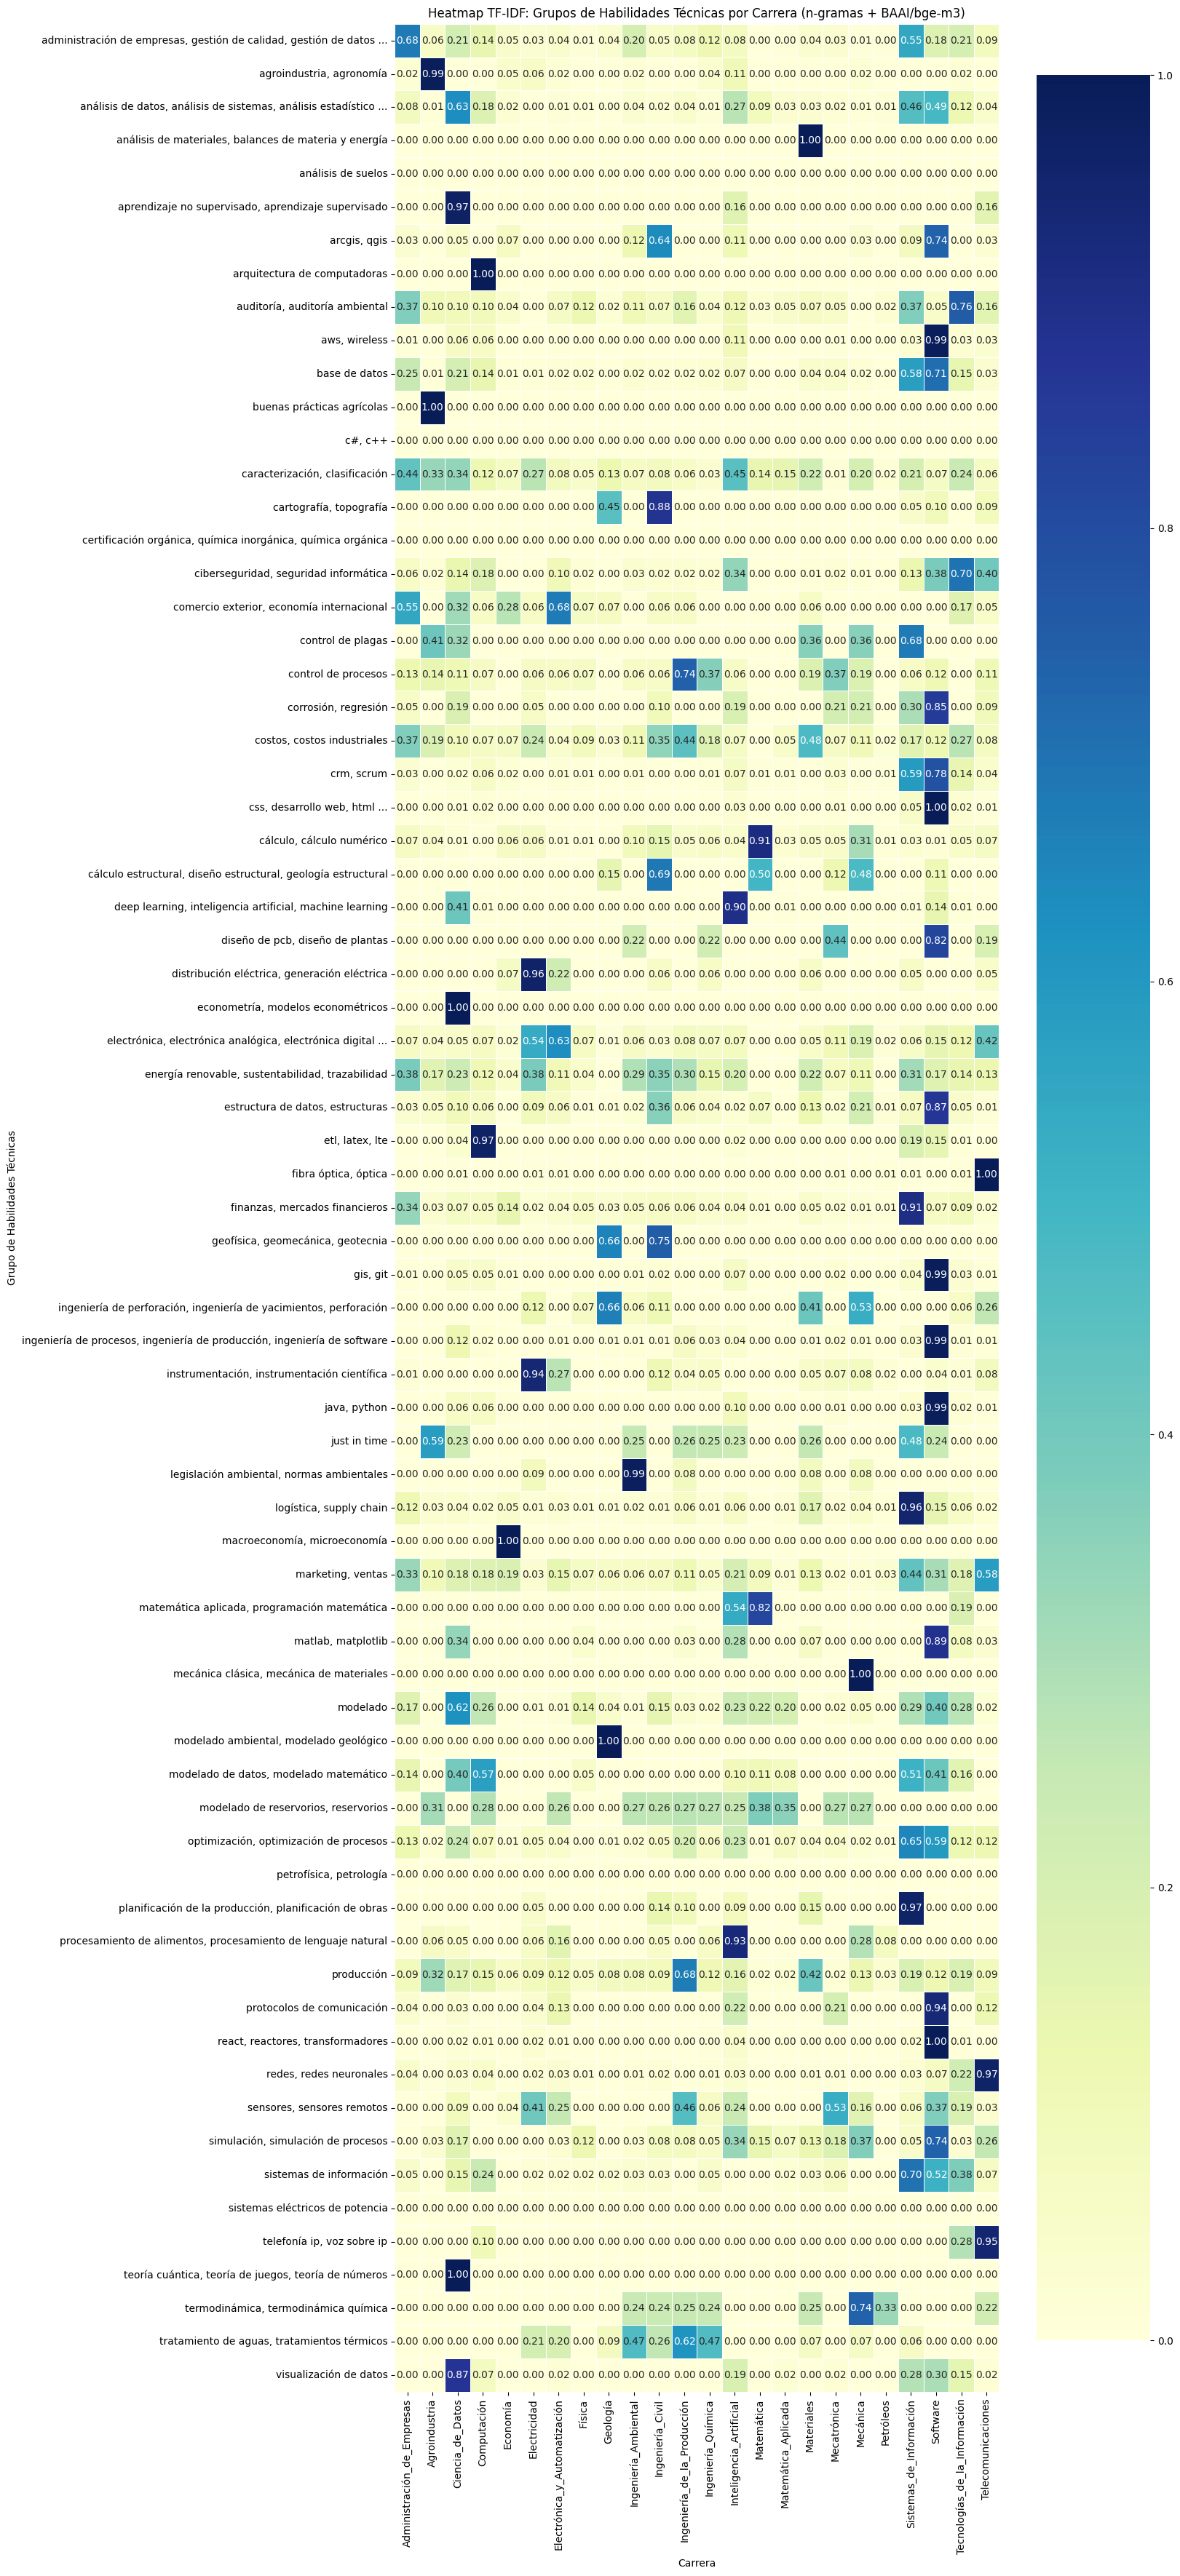

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(16, max(6, len(tfidf_emb_df)*0.5)))
sns.heatmap(tfidf_emb_df, annot=True, fmt='.2f', cmap='YlGnBu', linewidths=0.5)
plt.title('Heatmap TF-IDF: Grupos de Habilidades Técnicas por Carrera (n-gramas + BAAI/bge-m3)')
plt.xlabel('Carrera')
plt.ylabel('Grupo de Habilidades Técnicas')
plt.tight_layout()
plt.show()

## 9. Espacio vectorial de carreras usando los 74 grupos
Cada carrera se representa como un vector de 74 dimensiones, donde cada dimensión corresponde a un grupo de habilidades técnicas. Así, podemos comparar carreras de manera cuantitativa y visualizar cómo se distribuyen las habilidades agrupadas en cada una.

In [11]:
# Visualización del espacio vectorial: cada carrera como vector de 74 dimensiones (usando TF-IDF)
print("Espacio vectorial TF-IDF (cada carrera es un vector de 74 dimensiones):")
espacio_vectorial_tfidf = tfidf_emb_df.T  # filas: carreras, columnas: grupos
display(espacio_vectorial_tfidf)

Espacio vectorial TF-IDF (cada carrera es un vector de 74 dimensiones):


,"administración de empresas, gestión de calidad, gestión de datos ...","agroindustria, agronomía","análisis de datos, análisis de sistemas, análisis estadístico ...","análisis de materiales, balances de materia y energía",análisis de suelos,"aprendizaje no supervisado, aprendizaje supervisado","arcgis, qgis",arquitectura de computadoras,"auditoría, auditoría ambiental","aws, wireless",...,"redes, redes neuronales","sensores, sensores remotos","simulación, simulación de procesos",sistemas de información,sistemas eléctricos de potencia,"telefonía ip, voz sobre ip","teoría cuántica, teoría de juegos, teoría de números","termodinámica, termodinámica química","tratamiento de aguas, tratamientos térmicos",visualización de datos
Administración_de_Empresas,0.681965,0.020330,0.083474,0.0,0.0,0.000000,0.031344,0.0,0.374420,0.005726,...,0.042919,0.000000,0.000000,0.050274,0.0,0.000000,0.0,0.000000,0.000000,0.000000
Agroindustria,0.057400,0.989546,0.008148,0.0,0.0,0.000000,0.000000,0.0,0.103548,0.000000,...,0.004373,0.000000,0.030024,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000
Ciencia_de_Datos,0.212645,0.000000,0.631728,0.0,0.0,0.973314,0.054494,0.0,0.097644,0.062664,...,0.032400,0.088802,0.165158,0.145675,0.0,0.000000,1.0,0.000000,0.000000,0.873287
Computación,0.143157,0.000000,0.179676,0.0,0.0,0.000000,0.000000,1.0,0.095145,0.060946,...,0.041329,0.000000,0.000000,0.238470,0.0,0.102835,0.0,0.000000,0.000000,0.074263
Economía,0.050076,0.045780,0.024878,0.0,0.0,0.000000,0.070580,0.0,0.042156,0.001517,...,0.001272,0.038339,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000
Electricidad,0.033357,0.060991,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,0.015812,0.408618,0.000000,0.016758,0.0,0.000000,0.0,0.000000,0.212390,0.000000
Electrónica_y_Automatización,0.044516,0.018783,0.013610,0.0,0.0,0.000000,0.000000,0.0,0.069186,0.004046,...,0.027653,0.251684,0.025076,0.015483,0.0,0.000000,0.0,0.000000,0.196229,0.016875
Física,0.012088,0.000000,0.010676,0.0,0.0,0.000000,0.000000,0.0,0.122116,0.000732,...,0.006139,0.000000,0.118029,0.018218,0.0,0.000000,0.0,0.000000,0.000000,0.000000
Geología,0.035931,0.000000,0.002975,0.0,0.0,0.000000,0.000000,0.0,0.022686,0.000000,...,0.002737,0.000000,0.000000,0.020307,0.0,0.000000,0.0,0.000000,0.085792,0.000000
Ingeniería_Ambiental,0.204906,0.019379,0.035103,0.0,0.0,0.000000,0.119507,0.0,0.107069,0.002569,...,0.008074,0.000000,0.025871,0.031947,0.0,0.000000,0.0,0.243117,0.472383,0.000000


## Visualización de carreras en 2D usando PCA y UMAP
A continuación, se muestran ejemplos de cómo reducir el espacio vectorial de las carreras a dos dimensiones usando PCA (Análisis de Componentes Principales) y UMAP, para facilitar la visualización y comparación de perfiles de habilidades técnicas entre carreras.

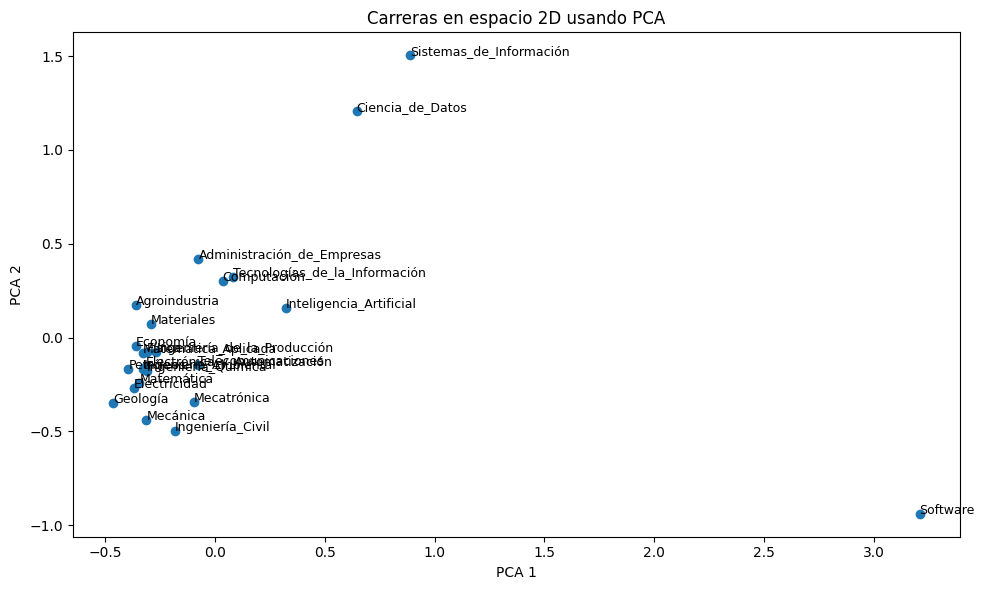

In [12]:
# Visualización con PCA
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA(n_components=2)
pca_result = pca.fit_transform(espacio_vectorial_tfidf.values)
plt.figure(figsize=(10,6))
plt.scatter(pca_result[:,0], pca_result[:,1])
for i, carrera in enumerate(espacio_vectorial_tfidf.index):
    plt.text(pca_result[i,0], pca_result[i,1], carrera, fontsize=9)
plt.title('Carreras en espacio 2D usando PCA')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.tight_layout()
plt.show()

**Interpretación PCA**

**¿Qué muestra este PCA?**
El PCA reduce las 74 dimensiones (grupos de habilidades) a solo 2 componentes.  
Esto nos permite visualizar a las carreras según las habilidades técnicas que las caracterizan.

**Cómo interpretar el gráfico**
- **Cada punto es una carrera**, representada por sus habilidades predominantes.
- **Carreras cercanas** → comparten perfiles de habilidades similares.  
- **Carreras alejadas** → requieren habilidades técnicas distintas.
- **Ejes PC1 y PC2** → no se interpretan literalmente; son combinaciones matemáticas de las 74 habilidades agrupadas.

**¿Qué revela el PCA en este caso?**
1. Existen **grupos naturales de carreras** que comparten habilidades técnicas (por ejemplo: tecnologias de la Información y Computación).
2. Algunas carreras quedan **más aisladas** porque tienen competencias más particulares.
3. El PCA nos da una **vista global** de cómo se organizan los perfiles profesionales según la demanda del mercado laboral.

**Limitaciones del PCA**
- La reducción es lineal, por lo que puede perder relaciones complejas.
- No siempre separa bien grupos que tienen fronteras curvas o no lineales.


c:\Users\diego\AppData\Local\Programs\Python\Python311\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


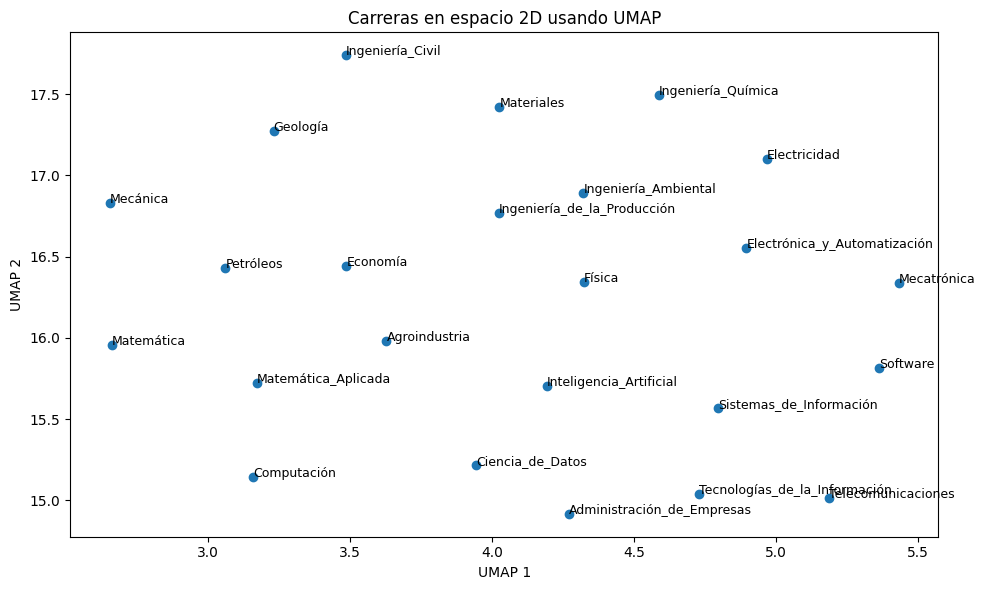

In [13]:
# Visualización con UMAP
import umap
umap_model = umap.UMAP(random_state=42)
umap_result = umap_model.fit_transform(espacio_vectorial_tfidf.values)
plt.figure(figsize=(10,6))
plt.scatter(umap_result[:,0], umap_result[:,1])
for i, carrera in enumerate(espacio_vectorial_tfidf.index):
    plt.text(umap_result[i,0], umap_result[i,1], carrera, fontsize=9)
plt.title('Carreras en espacio 2D usando UMAP')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.tight_layout()
plt.show()

**Interpretación UMAP**

**¿Qué aporta UMAP?**
UMAP reduce las 74 dimensiones a un plano 2D, pero **manteniendo mejor la estructura real del espacio** que PCA, especialmente en relaciones no lineales.

**Cómo interpretar el gráfico**
- **Cada punto representa una carrera**, igual que en PCA.
- **Carreras juntas** → comparten habilidades similares.
- **Carreras separadas** → tienen perfiles de habilidades diferentes.
- Los grupos formados por UMAP reflejan **patrones más naturales**, ya que UMAP conserva mejor las relaciones de vecindad.

**¿Qué revela el UMAP en este análisis?**
1. Se distinguen **clústeres más definidos** de carreras según habilidades técnicas demandadas.
2. Es más probable observar **grupos pequeños** o relaciones sutiles entre carreras.
3. El UMAP permite ver **estructuras curvas o complejas** que PCA no puede capturar.

**Ventajas frente a PCA**
- Captura relaciones no lineales.
- Mantiene mejor la estructura local (carreras muy similares).
- Produce agrupaciones más interpretables visualmente.

**Consideraciones del UMAP**
- El resultado depende de los hiperparámetros.
- No debe interpretarse como un mapa exacto, sino como una guía visual de similitudes.


## Análisis de ofertas laborales de Software en el espacio vectorial
En esta sección, vamos a vectorizar cada oferta de trabajo del archivo "Software_Merged.csv" en el espacio de 74 dimensiones (grupos de habilidades técnicas). Luego, visualizaremos:
- Solo la carrera de Software y sus ofertas en el espacio UMAP.
- Todas las carreras junto con las ofertas de Software en el espacio UMAP.
Esto permitirá ver si las ofertas de trabajo de Software se agrupan cerca del vector promedio de la carrera y cómo se distribuyen respecto a otras carreras.

In [18]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

# 1. Cargar datos de Software
data_software = pd.read_csv('todas_las_plataformas/Software/Software_Merged.csv', dtype=str)

def unir_textos(row):
    texto = ''
    if pd.notnull(row.get('skills', None)):
        texto += str(row['skills']) + ' '
    if pd.notnull(row.get('description', None)):
        texto += str(row['description'])
    return texto.lower()

textos_ofertas = data_software.apply(unir_textos, axis=1).tolist()

# 2. Vectorizar usando las MISMAS "habilidades" (vocabulario)
vectorizer_ofertas = CountVectorizer(
    vocabulary=habilidades,
    analyzer='word',
    ngram_range=(1, 5),
    lowercase=True
)

X_ofertas = vectorizer_ofertas.transform(textos_ofertas)
matriz_td_ofertas = pd.DataFrame(
    X_ofertas.T.toarray(),
    index=vectorizer_ofertas.get_feature_names_out()
)

# 3. Construir espacio 74D para las ofertas
# Crear matriz 74D vacía (columnas = grupos; filas = ofertas)
ofertas_74d = pd.DataFrame(0, index=range(len(textos_ofertas)), columns=matriz_td_emb.index)

for grupo, terms in grupos_bge_ngram.items():

    grupo_name = ', '.join(terms[:3]) + (' ...' if len(terms) > 3 else '')

    if grupo_name in ofertas_74d.columns:
        # Seleccionar solo términos presentes en la matriz de ofertas
        terms_validos = [t for t in terms if t in matriz_td_ofertas.index]

        if len(terms_validos) > 0:
            ofertas_74d[grupo_name] = matriz_td_ofertas.loc[terms_validos].sum()

# 4. ENTRENAR UN NUEVO TF-IDF DE 74 COLUMNAS
tfidf_74 = TfidfTransformer()
tfidf_74.fit(matriz_td_emb.T.values)   # ENTRENAR SOBRE LAS CARRERAS (74 grupos)
# Transformar ofertas
ofertas_74d_tfidf = pd.DataFrame(
    tfidf_74.transform(ofertas_74d.values).toarray(),
    columns=ofertas_74d.columns
)

ofertas_74d_tfidf['carrera'] = 'Software'

In [22]:
ofertas_74d_tfidf.head(30)

,"administración de empresas, gestión de calidad, gestión de datos ...","agroindustria, agronomía","análisis de datos, análisis de sistemas, análisis estadístico ...","análisis de materiales, balances de materia y energía",análisis de suelos,"aprendizaje no supervisado, aprendizaje supervisado","arcgis, qgis",arquitectura de computadoras,"auditoría, auditoría ambiental","aws, wireless",...,"simulación, simulación de procesos",sistemas de información,sistemas eléctricos de potencia,"telefonía ip, voz sobre ip","teoría cuántica, teoría de juegos, teoría de números","termodinámica, termodinámica química","tratamiento de aguas, tratamientos térmicos",visualización de datos,tipo,carrera
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,oferta,Software
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,oferta,Software
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,oferta,Software
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,oferta,Software
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,oferta,Software
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,oferta,Software
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,oferta,Software
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,oferta,Software
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,oferta,Software
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,oferta,Software


### Visualización UMAP: Carrera de Software y sus ofertas laborales
En este gráfico, se muestra la carrera de Software (vector promedio) junto con todas sus ofertas laborales, proyectadas en el espacio UMAP de 2 dimensiones. Así puedes ver si las ofertas rodean o se agrupan cerca del perfil promedio de la carrera.

c:\Users\diego\AppData\Local\Programs\Python\Python311\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


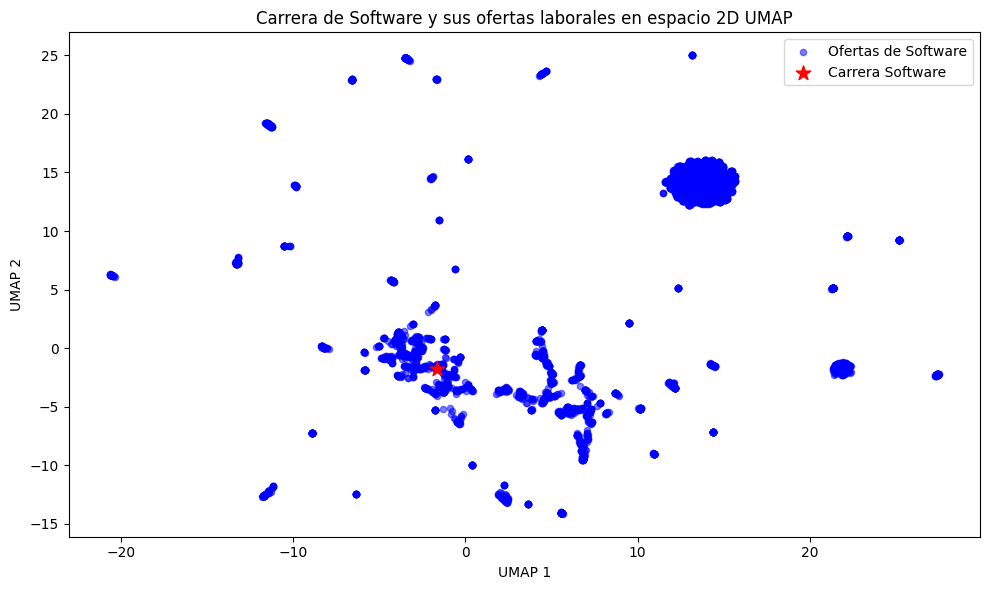

In [23]:
# 2. UMAP: Carrera de Software y sus ofertas laborales
import numpy as np
# Vector de la carrera Software (en espacio TF-IDF de 74d)
software_vector = espacio_vectorial_tfidf.loc[['Software']]
software_vector['tipo'] = 'carrera'
software_vector['carrera'] = 'Software'

# Unir carrera y ofertas
umap_software = pd.concat([software_vector, ofertas_74d_tfidf], ignore_index=True)
X_umap_software = umap_software.drop(['tipo', 'carrera'], axis=1).values

umap_model_sw = umap.UMAP(
    init='random',
    random_state=42
)
umap_result_sw = umap_model_sw.fit_transform(X_umap_software)

plt.figure(figsize=(10,6))
plt.scatter(umap_result_sw[1:,0], umap_result_sw[1:,1], c='blue', label='Ofertas de Software', s=20, alpha=0.5)
plt.scatter(umap_result_sw[0,0], umap_result_sw[0,1], c='red', label='Carrera Software', s=120, marker='*')
plt.legend()
plt.title('Carrera de Software y sus ofertas laborales en espacio 2D UMAP')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.tight_layout()
plt.show()

### Visualización UMAP: Todas las carreras y ofertas laborales de Software
En este gráfico, se muestran todas las carreras (vectores promedio) junto con las ofertas laborales de Software, proyectadas en el espacio UMAP. Así puedes ver cómo se distribuyen las ofertas de Software respecto a todas las carreras y si se agrupan cerca de la carrera de Software o de otras carreras.

c:\Users\diego\AppData\Local\Programs\Python\Python311\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


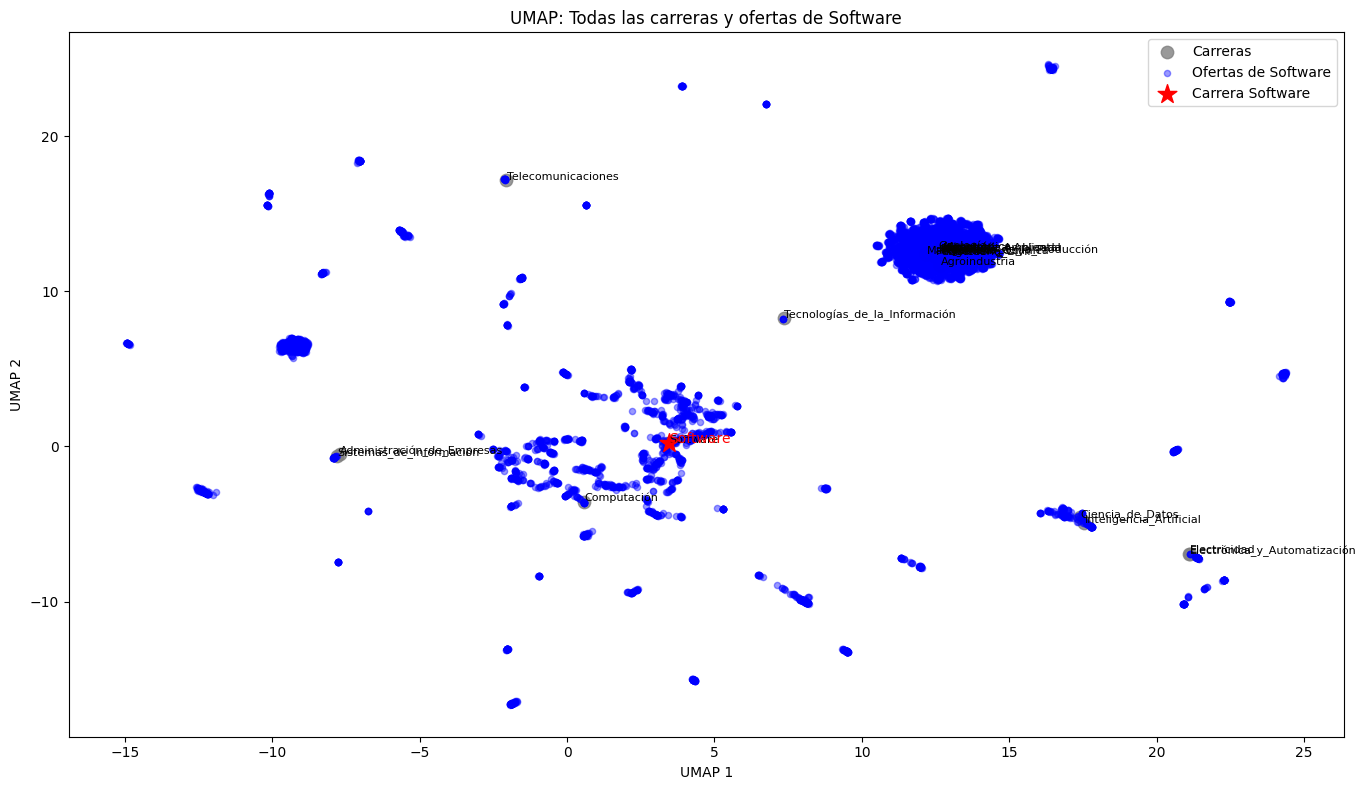

In [25]:
import umap
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 1. Cargar vectores de TODAS las carreras (74 dimensiones)
carreras_74d = espacio_vectorial_tfidf.copy()
carreras_74d['tipo'] = 'carrera'
carreras_74d['carrera'] = carreras_74d.index

# 2. Preparar ofertas laborales de Software
ofertas_sw = ofertas_74d_tfidf.copy()
ofertas_sw['tipo'] = 'oferta'
ofertas_sw['carrera'] = 'Software'

# 3. Unir todo en un solo DataFrame
umap_all = pd.concat([carreras_74d, ofertas_sw], ignore_index=True)

# Matriz para UMAP (solo valores 74D)
X_umap = umap_all.drop(['tipo', 'carrera'], axis=1).values

# 4. UMAP: Proyección 2D
umap_model = umap.UMAP(
    init='random',
    random_state=42
)
umap_result = umap_model.fit_transform(X_umap)

# 5. Plot
plt.figure(figsize=(14, 8))

# Todas las carreras
mask_carreras = umap_all['tipo'] == 'carrera'
plt.scatter(
    umap_result[mask_carreras, 0],
    umap_result[mask_carreras, 1],
    c='gray',
    s=80,
    label='Carreras',
    alpha=0.8
)

# --- 🔤 AGREGAR NOMBRES DE LAS CARRERAS ---
for i, row in umap_all[mask_carreras].iterrows():
    x, y = umap_result[i]
    plt.text(
        x + 0.02, y + 0.02,           # pequeño desplazamiento para que no tape el punto
        row['carrera'],               # nombre
        fontsize=8, 
        color='black'
    )

# Ofertas de Software
mask_ofertas = umap_all['tipo'] == 'oferta'
plt.scatter(
    umap_result[mask_ofertas, 0],
    umap_result[mask_ofertas, 1],
    c='blue',
    s=20,
    alpha=0.4,
    label='Ofertas de Software'
)

# Carrera Software (marcar con estrella y nombre)
coord_software = umap_result[umap_all['carrera'] == 'Software'][0]
plt.scatter(
    coord_software[0],
    coord_software[1],
    c='red',
    s=200,
    marker='*',
    label='Carrera Software'
)
plt.text(
    coord_software[0] + 0.02,
    coord_software[1] + 0.02,
    'Software',
    fontsize=10,
    color='red'
)

plt.title('UMAP: Todas las carreras y ofertas de Software')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.legend()
plt.tight_layout()
plt.show()

## Análisis de ofertas laborales de Administración de Empresas en el espacio vectorial
En esta sección, vamos a vectorizar cada oferta de trabajo del archivo "Administración_de_Empresas_Merged.csv" en el espacio de 74 dimensiones (grupos de habilidades técnicas). Luego, visualizaremos:
- Solo la carrera de Administración de Empresas y sus ofertas en el espacio UMAP.
- Todas las carreras junto con las ofertas de Administración de Empresas en el espacio UMAP.
Esto permitirá ver si las ofertas de trabajo de Administración de Empresas se agrupan cerca del vector promedio de la carrera y cómo se distribuyen respecto a otras carreras.

In [33]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

# 1. Cargar datos de Administración de Empresas
ruta_ae = 'todas_las_plataformas/Administración_de_Empresas/Administración_de_Empresas_Merged.csv'
data_ae = pd.read_csv(ruta_ae, dtype=str)

def unir_textos_ae(row):
    texto = ''
    if pd.notnull(row.get('skills', None)):
        texto += str(row['skills']) + ' '
    if pd.notnull(row.get('description', None)):
        texto += str(row['description'])
    return texto.lower()

textos_ofertas_ae = data_ae.apply(unir_textos_ae, axis=1).tolist()

# 2. Vectorizar usando las MISMAS "habilidades" (vocabulario)
vectorizer_ofertas_ae = CountVectorizer(
    vocabulary=habilidades,
    analyzer='word',
    ngram_range=(1, 5),
    lowercase=True
)

X_ofertas_ae = vectorizer_ofertas_ae.transform(textos_ofertas_ae)
matriz_td_ofertas_ae = pd.DataFrame(
    X_ofertas_ae.T.toarray(),
    index=vectorizer_ofertas_ae.get_feature_names_out()
)

# 3. Construir espacio 74D para las ofertas
ofertas_74d_ae = pd.DataFrame(0, index=range(len(textos_ofertas_ae)), columns=matriz_td_emb.index)
for grupo, terms in grupos_bge_ngram.items():
    grupo_name = ', '.join(terms[:3]) + (' ...' if len(terms) > 3 else '')
    if grupo_name in ofertas_74d_ae.columns:
        terms_validos = [t for t in terms if t in matriz_td_ofertas_ae.index]
        if len(terms_validos) > 0:
            ofertas_74d_ae[grupo_name] = matriz_td_ofertas_ae.loc[terms_validos].sum()

# 4. ENTRENAR UN NUEVO TF-IDF DE 74 COLUMNAS
tfidf_74_ae = TfidfTransformer()
tfidf_74_ae.fit(matriz_td_emb.T.values)   # ENTRENAR SOBRE LAS CARRERAS (74 grupos)
# Transformar ofertas
ofertas_74d_tfidf_ae = pd.DataFrame(
    tfidf_74_ae.transform(ofertas_74d_ae.values).toarray(),
    columns=ofertas_74d_ae.columns
)
ofertas_74d_tfidf_ae['carrera'] = 'Administración_de_Empresas'

In [34]:
ofertas_74d_tfidf_ae.head(10)

,"administración de empresas, gestión de calidad, gestión de datos ...","agroindustria, agronomía","análisis de datos, análisis de sistemas, análisis estadístico ...","análisis de materiales, balances de materia y energía",análisis de suelos,"aprendizaje no supervisado, aprendizaje supervisado","arcgis, qgis",arquitectura de computadoras,"auditoría, auditoría ambiental","aws, wireless",...,"sensores, sensores remotos","simulación, simulación de procesos",sistemas de información,sistemas eléctricos de potencia,"telefonía ip, voz sobre ip","teoría cuántica, teoría de juegos, teoría de números","termodinámica, termodinámica química","tratamiento de aguas, tratamientos térmicos",visualización de datos,carrera
0,1.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Administración_de_Empresas
1,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Administración_de_Empresas
2,1.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Administración_de_Empresas
3,1.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Administración_de_Empresas
4,0.375500,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Administración_de_Empresas
5,1.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Administración_de_Empresas
6,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Administración_de_Empresas
7,0.534577,0.0,0.534577,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Administración_de_Empresas
8,1.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Administración_de_Empresas
9,1.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Administración_de_Empresas


### Visualización UMAP: Carrera de Administración de Empresas y sus ofertas laborales
En este gráfico, se muestra la carrera de Administración de Empresas (vector promedio) junto con todas sus ofertas laborales, proyectadas en el espacio UMAP de 2 dimensiones. Así puedes ver si las ofertas rodean o se agrupan cerca del perfil promedio de la carrera.

c:\Users\diego\AppData\Local\Programs\Python\Python311\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


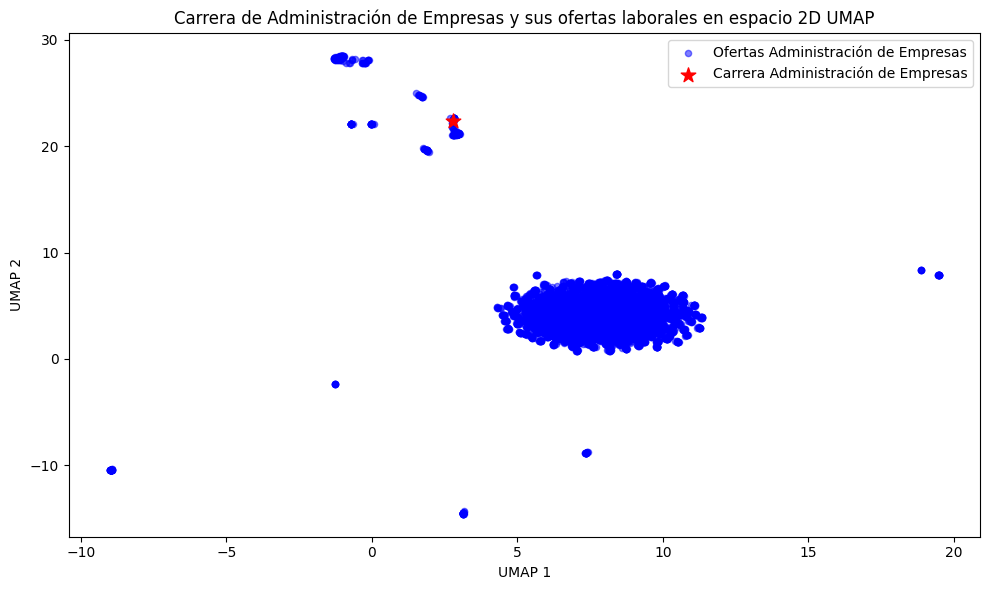

In [35]:
# 2. UMAP: Carrera de Administración de Empresas y sus ofertas laborales
import numpy as np
# Vector de la carrera Administración de Empresas (en espacio TF-IDF de 74d)
admon_vector = espacio_vectorial_tfidf.loc[["Administración_de_Empresas"]]
admon_vector['tipo'] = 'carrera'
admon_vector['carrera'] = 'Administración_de_Empresas'

# Unir carrera y ofertas
umap_ae = pd.concat([admon_vector, ofertas_74d_tfidf_ae], ignore_index=True)
X_umap_ae = umap_ae.drop(['tipo', 'carrera'], axis=1).values

umap_model_ae = umap.UMAP(
    init='random',
    random_state=42
)
umap_result_ae = umap_model_ae.fit_transform(X_umap_ae)

plt.figure(figsize=(10,6))
plt.scatter(umap_result_ae[1:,0], umap_result_ae[1:,1], c='blue', label='Ofertas Administración de Empresas', s=20, alpha=0.5)
plt.scatter(umap_result_ae[0,0], umap_result_ae[0,1], c='red', label='Carrera Administración de Empresas', s=120, marker='*')
plt.legend()
plt.title('Carrera de Administración de Empresas y sus ofertas laborales en espacio 2D UMAP')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.tight_layout()
plt.show()

### Visualización UMAP: Todas las carreras y ofertas laborales de Administración de Empresas
En este gráfico, se muestran todas las carreras (vectores promedio) junto con las ofertas laborales de Administración de Empresas, proyectadas en el espacio UMAP. Así puedes ver cómo se distribuyen las ofertas de Administración de Empresas respecto a todas las carreras y si se agrupan cerca de la carrera de Administración de Empresas o de otras carreras.

c:\Users\diego\AppData\Local\Programs\Python\Python311\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


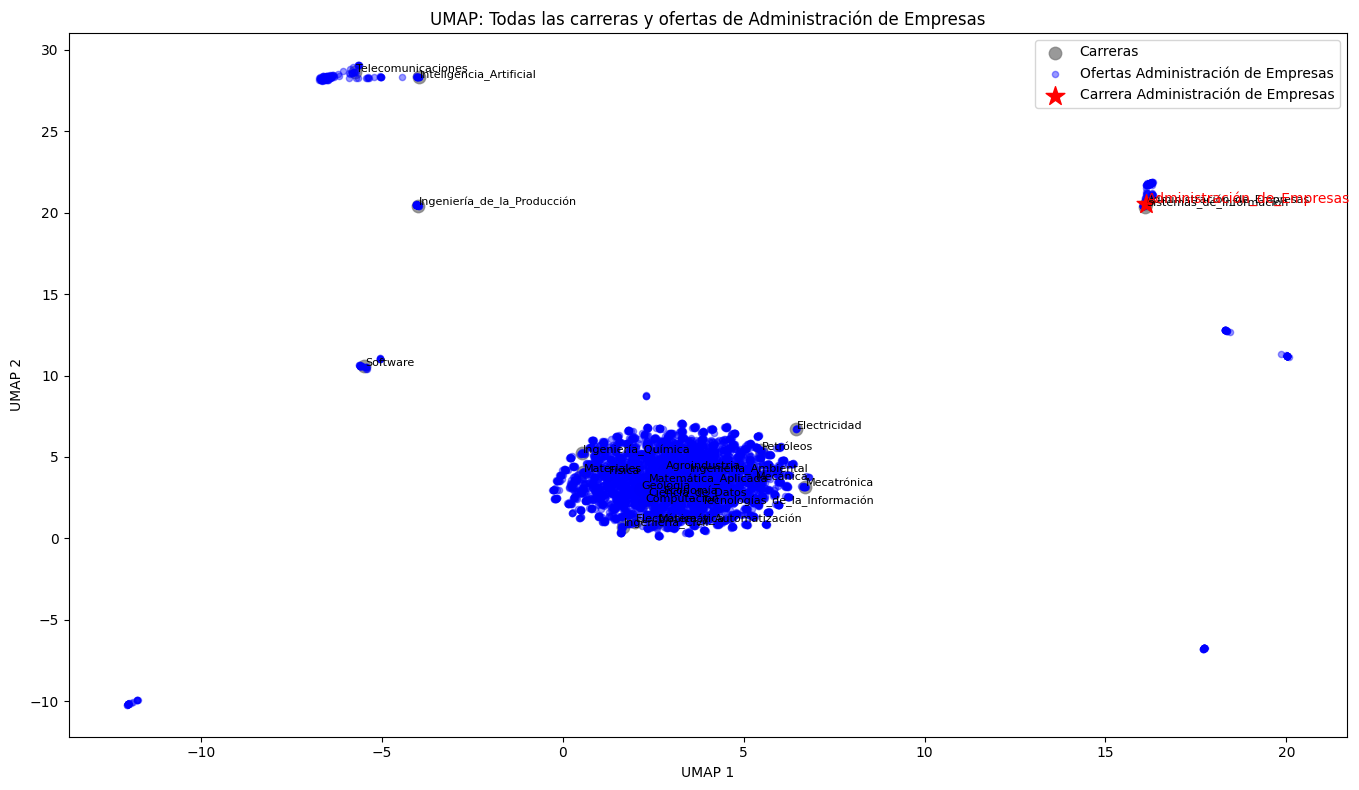

In [36]:
# UMAP: Todas las carreras y ofertas laborales de Administración de Empresas
carreras_74d_ae = espacio_vectorial_tfidf.copy()
carreras_74d_ae['tipo'] = 'carrera'
carreras_74d_ae['carrera'] = carreras_74d_ae.index

ofertas_ae = ofertas_74d_tfidf_ae.copy()
ofertas_ae['tipo'] = 'oferta'
ofertas_ae['carrera'] = 'Administración_de_Empresas'

umap_all_ae = pd.concat([carreras_74d_ae, ofertas_ae], ignore_index=True)
X_umap_ae_all = umap_all_ae.drop(['tipo', 'carrera'], axis=1).values

umap_model_all_ae = umap.UMAP(
    init='random',
    random_state=42
)
umap_result_all_ae = umap_model_all_ae.fit_transform(X_umap_ae_all)

plt.figure(figsize=(14, 8))
# Todas las carreras
enmascarar_carreras = umap_all_ae['tipo'] == 'carrera'
plt.scatter(
    umap_result_all_ae[enmascarar_carreras, 0],
    umap_result_all_ae[enmascarar_carreras, 1],
    c='gray',
    s=80,
    label='Carreras',
    alpha=0.8
)
# Nombres de las carreras
for i, row in umap_all_ae[enmascarar_carreras].iterrows():
    x, y = umap_result_all_ae[i]
    plt.text(
        x + 0.02, y + 0.02,
        row['carrera'],
        fontsize=8,
        color='black'
    )
# Ofertas de Administración de Empresas
enmascarar_ofertas = umap_all_ae['tipo'] == 'oferta'
plt.scatter(
    umap_result_all_ae[enmascarar_ofertas, 0],
    umap_result_all_ae[enmascarar_ofertas, 1],
    c='blue',
    s=20,
    alpha=0.4,
    label='Ofertas Administración de Empresas'
)
# Carrera Administración de Empresas (estrella y nombre)
coord_ae = umap_result_all_ae[umap_all_ae['carrera'] == 'Administración_de_Empresas'][0]
plt.scatter(
    coord_ae[0],
    coord_ae[1],
    c='red',
    s=200,
    marker='*',
    label='Carrera Administración de Empresas'
)
plt.text(
    coord_ae[0] + 0.02,
    coord_ae[1] + 0.02,
    'Administración_de_Empresas',
    fontsize=10,
    color='red'
)
plt.title('UMAP: Todas las carreras y ofertas de Administración de Empresas')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.legend()
plt.tight_layout()
plt.show()

## Análisis de ofertas laborales de Computación en el espacio vectorial
En esta sección, vamos a vectorizar cada oferta de trabajo del archivo "Computación_Merged.csv" en el espacio de 74 dimensiones (grupos de habilidades técnicas). Luego, visualizaremos:
- Solo la carrera de Computación y sus ofertas en el espacio UMAP.
- Todas las carreras junto con las ofertas de Computación en el espacio UMAP.
Esto permitirá ver si las ofertas de trabajo de Computación se agrupan cerca del vector promedio de la carrera y cómo se distribuyen respecto a otras carreras.

In [37]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

# 1. Cargar datos de Computación
ruta_comp = 'todas_las_plataformas/Computación/Computación_Merged.csv'
data_comp = pd.read_csv(ruta_comp, dtype=str)

def unir_textos_comp(row):
    texto = ''
    if pd.notnull(row.get('skills', None)):
        texto += str(row['skills']) + ' '
    if pd.notnull(row.get('description', None)):
        texto += str(row['description'])
    return texto.lower()

textos_ofertas_comp = data_comp.apply(unir_textos_comp, axis=1).tolist()

# 2. Vectorizar usando las MISMAS "habilidades" (vocabulario)
vectorizer_ofertas_comp = CountVectorizer(
    vocabulary=habilidades,
    analyzer='word',
    ngram_range=(1, 5),
    lowercase=True
)

X_ofertas_comp = vectorizer_ofertas_comp.transform(textos_ofertas_comp)
matriz_td_ofertas_comp = pd.DataFrame(
    X_ofertas_comp.T.toarray(),
    index=vectorizer_ofertas_comp.get_feature_names_out()
)

# 3. Construir espacio 74D para las ofertas
ofertas_74d_comp = pd.DataFrame(0, index=range(len(textos_ofertas_comp)), columns=matriz_td_emb.index)
for grupo, terms in grupos_bge_ngram.items():
    grupo_name = ', '.join(terms[:3]) + (' ...' if len(terms) > 3 else '')
    if grupo_name in ofertas_74d_comp.columns:
        terms_validos = [t for t in terms if t in matriz_td_ofertas_comp.index]
        if len(terms_validos) > 0:
            ofertas_74d_comp[grupo_name] = matriz_td_ofertas_comp.loc[terms_validos].sum()

# 4. ENTRENAR UN NUEVO TF-IDF DE 74 COLUMNAS
tfidf_74_comp = TfidfTransformer()
tfidf_74_comp.fit(matriz_td_emb.T.values)   # ENTRENAR SOBRE LAS CARRERAS (74 grupos)
# Transformar ofertas
ofertas_74d_tfidf_comp = pd.DataFrame(
    tfidf_74_comp.transform(ofertas_74d_comp.values).toarray(),
    columns=ofertas_74d_comp.columns
)
ofertas_74d_tfidf_comp['carrera'] = 'Computación'

In [38]:
ofertas_74d_tfidf_comp.head(10)

,"administración de empresas, gestión de calidad, gestión de datos ...","agroindustria, agronomía","análisis de datos, análisis de sistemas, análisis estadístico ...","análisis de materiales, balances de materia y energía",análisis de suelos,"aprendizaje no supervisado, aprendizaje supervisado","arcgis, qgis",arquitectura de computadoras,"auditoría, auditoría ambiental","aws, wireless",...,"sensores, sensores remotos","simulación, simulación de procesos",sistemas de información,sistemas eléctricos de potencia,"telefonía ip, voz sobre ip","teoría cuántica, teoría de juegos, teoría de números","termodinámica, termodinámica química","tratamiento de aguas, tratamientos térmicos",visualización de datos,carrera
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Computación
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Computación
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Computación
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Computación
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Computación
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Computación
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Computación
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Computación
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Computación
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Computación


### Visualización UMAP: Carrera de Computación y sus ofertas laborales
En este gráfico, se muestra la carrera de Computación (vector promedio) junto con todas sus ofertas laborales, proyectadas en el espacio UMAP de 2 dimensiones. Así puedes ver si las ofertas rodean o se agrupan cerca del perfil promedio de la carrera.

c:\Users\diego\AppData\Local\Programs\Python\Python311\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


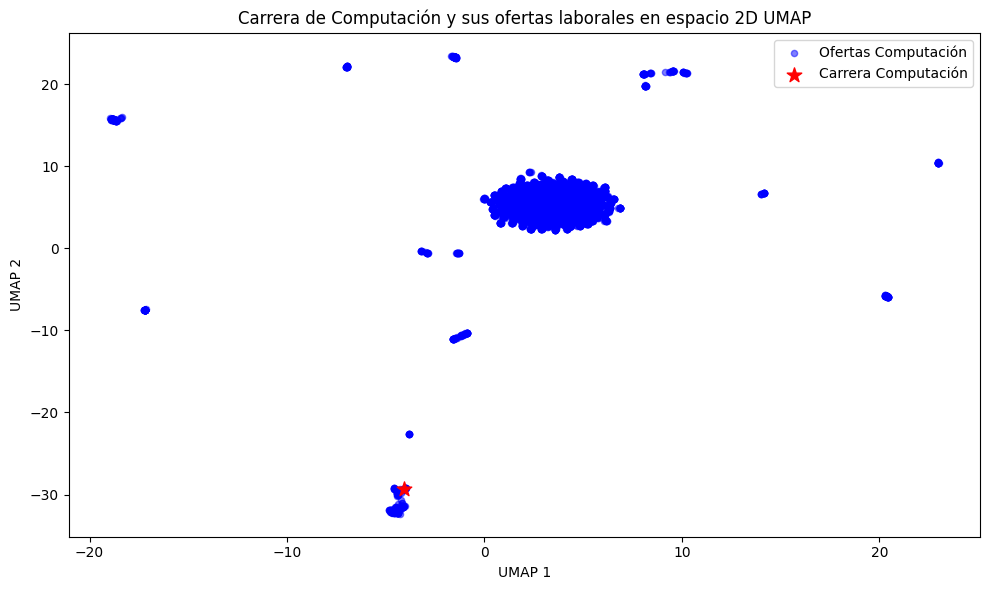

In [39]:
# 2. UMAP: Carrera de Computación y sus ofertas laborales
import numpy as np
# Vector de la carrera Computación (en espacio TF-IDF de 74d)
comp_vector = espacio_vectorial_tfidf.loc[["Computación"]]
comp_vector['tipo'] = 'carrera'
comp_vector['carrera'] = 'Computación'

# Unir carrera y ofertas
umap_comp = pd.concat([comp_vector, ofertas_74d_tfidf_comp], ignore_index=True)
X_umap_comp = umap_comp.drop(['tipo', 'carrera'], axis=1).values

umap_model_comp = umap.UMAP(
    init='random',
    random_state=42
)
umap_result_comp = umap_model_comp.fit_transform(X_umap_comp)

plt.figure(figsize=(10,6))
plt.scatter(umap_result_comp[1:,0], umap_result_comp[1:,1], c='blue', label='Ofertas Computación', s=20, alpha=0.5)
plt.scatter(umap_result_comp[0,0], umap_result_comp[0,1], c='red', label='Carrera Computación', s=120, marker='*')
plt.legend()
plt.title('Carrera de Computación y sus ofertas laborales en espacio 2D UMAP')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.tight_layout()
plt.show()

### Visualización UMAP: Todas las carreras y ofertas laborales de Computación
En este gráfico, se muestran todas las carreras (vectores promedio) junto con las ofertas laborales de Computación, proyectadas en el espacio UMAP. Así puedes ver cómo se distribuyen las ofertas de Computación respecto a todas las carreras y si se agrupan cerca de la carrera de Computación o de otras carreras.

c:\Users\diego\AppData\Local\Programs\Python\Python311\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


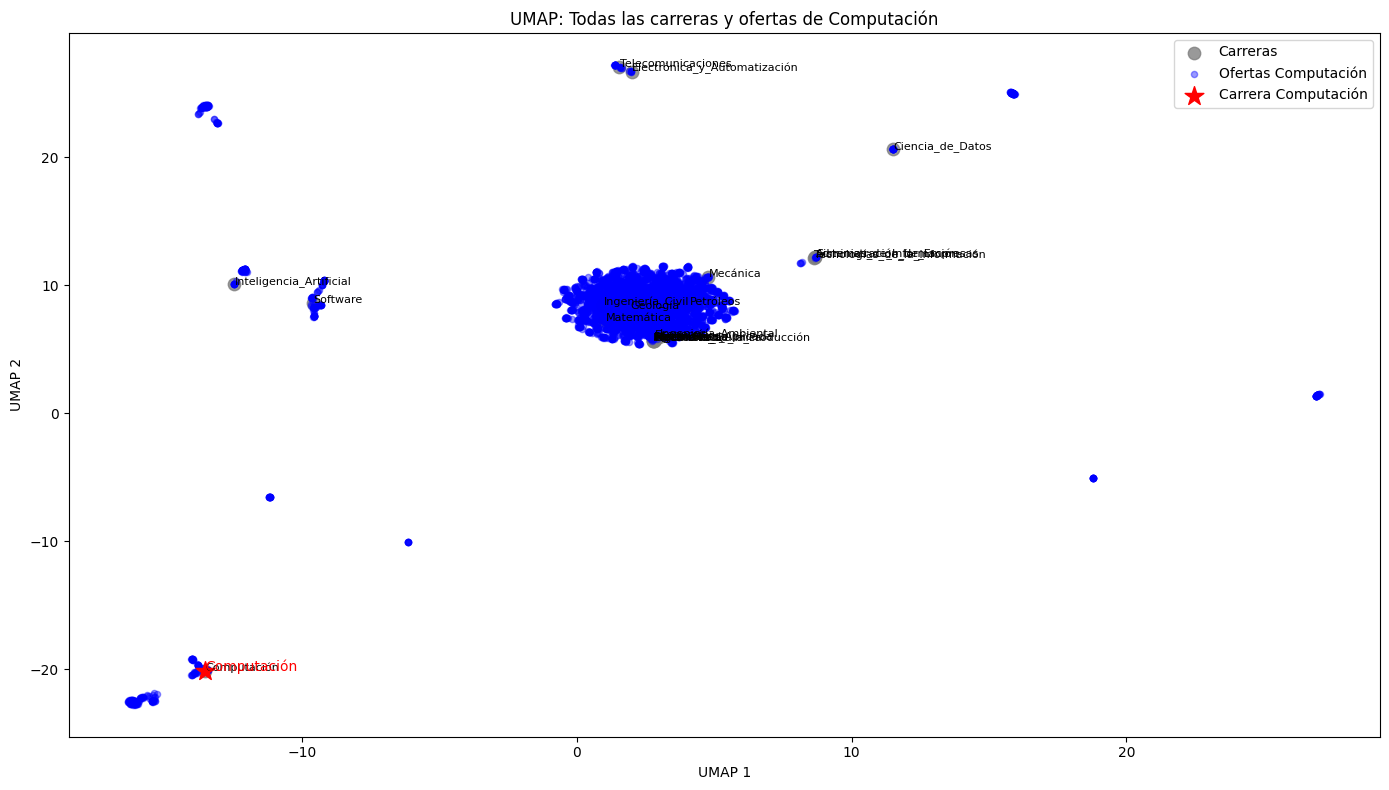

In [40]:
# UMAP: Todas las carreras y ofertas laborales de Computación
carreras_74d_comp = espacio_vectorial_tfidf.copy()
carreras_74d_comp['tipo'] = 'carrera'
carreras_74d_comp['carrera'] = carreras_74d_comp.index

ofertas_comp = ofertas_74d_tfidf_comp.copy()
ofertas_comp['tipo'] = 'oferta'
ofertas_comp['carrera'] = 'Computación'

umap_all_comp = pd.concat([carreras_74d_comp, ofertas_comp], ignore_index=True)
X_umap_comp_all = umap_all_comp.drop(['tipo', 'carrera'], axis=1).values

umap_model_all_comp = umap.UMAP(
    init='random',
    random_state=42
)
umap_result_all_comp = umap_model_all_comp.fit_transform(X_umap_comp_all)

plt.figure(figsize=(14, 8))
# Todas las carreras
enmascarar_carreras = umap_all_comp['tipo'] == 'carrera'
plt.scatter(
    umap_result_all_comp[enmascarar_carreras, 0],
    umap_result_all_comp[enmascarar_carreras, 1],
    c='gray',
    s=80,
    label='Carreras',
    alpha=0.8
)
# Nombres de las carreras
for i, row in umap_all_comp[enmascarar_carreras].iterrows():
    x, y = umap_result_all_comp[i]
    plt.text(
        x + 0.02, y + 0.02,
        row['carrera'],
        fontsize=8,
        color='black'
    )
# Ofertas de Computación
enmascarar_ofertas = umap_all_comp['tipo'] == 'oferta'
plt.scatter(
    umap_result_all_comp[enmascarar_ofertas, 0],
    umap_result_all_comp[enmascarar_ofertas, 1],
    c='blue',
    s=20,
    alpha=0.4,
    label='Ofertas Computación'
)
# Carrera Computación (estrella y nombre)
coord_comp = umap_result_all_comp[umap_all_comp['carrera'] == 'Computación'][0]
plt.scatter(
    coord_comp[0],
    coord_comp[1],
    c='red',
    s=200,
    marker='*',
    label='Carrera Computación'
)
plt.text(
    coord_comp[0] + 0.02,
    coord_comp[1] + 0.02,
    'Computación',
    fontsize=10,
    color='red'
)
plt.title('UMAP: Todas las carreras y ofertas de Computación')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.legend()
plt.tight_layout()
plt.show()

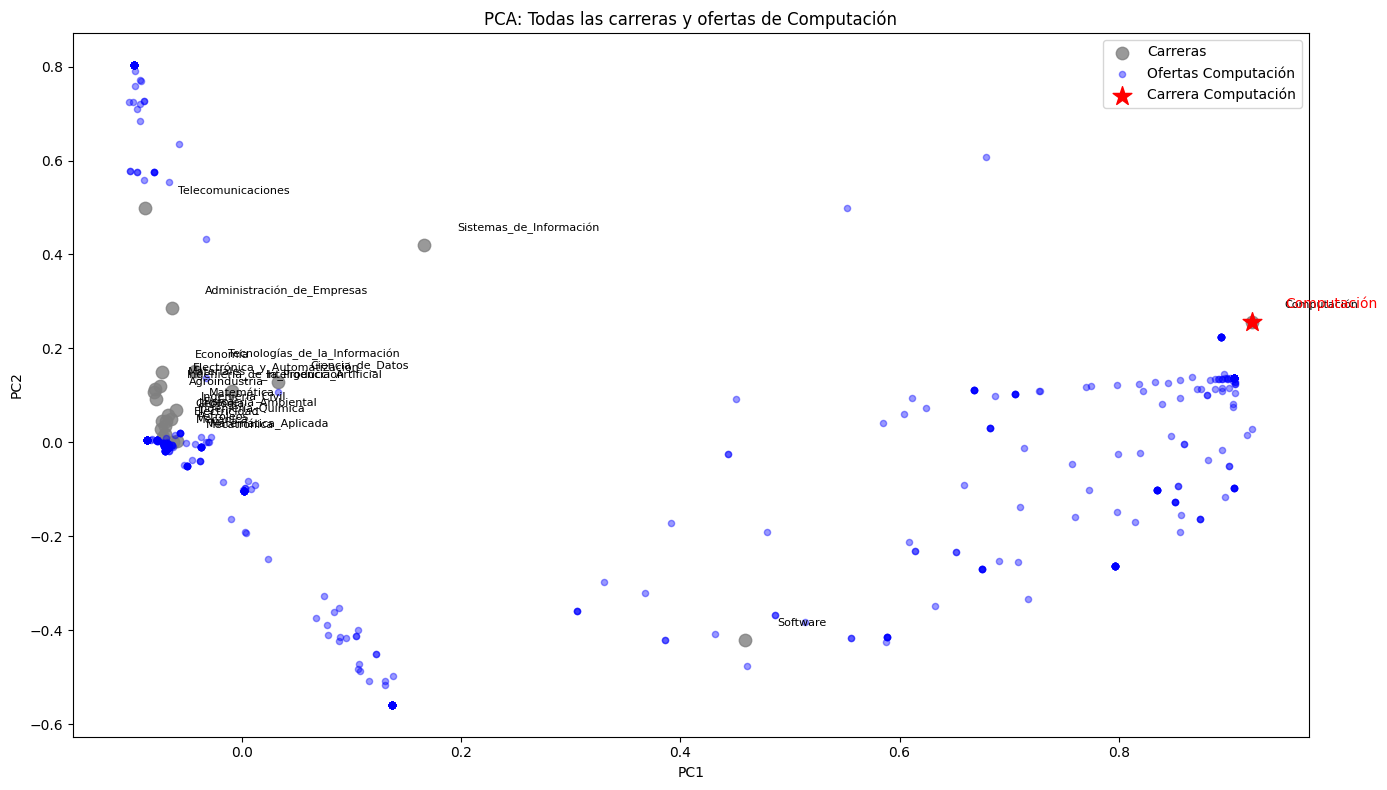

In [41]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 1. Preparar la matriz igual que en UMAP
pca_all_comp = umap_all_comp.copy()
X_pca_comp_all = pca_all_comp.drop(['tipo', 'carrera'], axis=1).values

# 2. PCA a 2 dimensiones
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_pca_comp_all)

# 3. Plot
plt.figure(figsize=(14, 8))

# Carreras
mask_carr = pca_all_comp['tipo'] == 'carrera'
plt.scatter(
    pca_result[mask_carr, 0],
    pca_result[mask_carr, 1],
    c='gray', s=80, alpha=0.8, label='Carreras'
)

# Nombres de las carreras
for i, row in pca_all_comp[mask_carr].iterrows():
    x, y = pca_result[i]
    plt.text(x + 0.03, y + 0.03, row['carrera'], fontsize=8)

# Ofertas Computación
mask_of = pca_all_comp['tipo'] == 'oferta'
plt.scatter(
    pca_result[mask_of, 0],
    pca_result[mask_of, 1],
    c='blue', s=20, alpha=0.4, label='Ofertas Computación'
)

# Carrera Computación (estrella)
coord_comp_pca = pca_result[pca_all_comp['carrera'] == 'Computación'][0]
plt.scatter(
    coord_comp_pca[0], coord_comp_pca[1],
    c='red', s=200, marker='*', label='Carrera Computación'
)
plt.text(coord_comp_pca[0] + 0.03, coord_comp_pca[1] + 0.03, "Computación", fontsize=10, color='red')

plt.title('PCA: Todas las carreras y ofertas de Computación')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.tight_layout()
plt.show()


#### Interpretación del PCA: Computación vs Mercado Laboral

Este gráfico PCA muestra la relación entre:

- **La carrera de Computación** (estrella roja)
- **Las ofertas laborales de Computación** (puntos azules)
- **Las demás carreras** (puntos grises)

1. La estrella roja está aislada a la derecha
Esto significa que la carrera de **Computación enseña habilidades muy diferentes** a las del resto de carreras.  
Es una carrera especializada y única dentro del conjunto.

2. Los puntos azules están cerca de la estrella roja
Las ofertas laborales de Computación están ubicadas muy cerca de la carrera, lo que significa que: **La carrera está bien alineada con lo que el mercado laboral realmente pide.**
Los puntos azules que se acercan a otras carreras son ofertas laborales de Computación que mezclan habilidades de otras áreas. No significa desalineación; significa que el mercado laboral de Computación es diverso.

3. Las demás carreras están agrupadas a la izquierda
Esto indica que esas carreras comparten habilidades entre sí, pero no con Computación.

### Conclusión del PCA
El PCA demuestra que:

- Computación es distinta al resto (posición aislada).
- El mercado laboral pide lo mismo que Computación enseña (puntos azules cerca de la estrella).



In [42]:
from sklearn.metrics.pairwise import euclidean_distances
import numpy as np

# Vector de la carrera (Computación)
v_carrera = espacio_vectorial_tfidf.loc["Computación"].values.reshape(1, -1)

# Promedio de las ofertas de Computación
v_ofertas = ofertas_74d_tfidf_comp.drop(['carrera'], axis=1).values
v_promedio_ofertas = np.mean(v_ofertas, axis=0).reshape(1, -1)

# Distancia real
distancia_real = euclidean_distances(v_carrera, v_promedio_ofertas)[0][0]
print("Distancia real Computación ↔ Mercado laboral:", distancia_real)


Distancia real Computación ↔ Mercado laboral: 1.6073614841908321


#### Distancia real entre Computación y el mercado laboral

La distancia entre el vector de la carrera de **Computación** y el promedio de las **ofertas laborales de Computación** es: **1.607**

¿Qué significa este número?

- Una distancia baja indica que **la carrera enseña casi lo mismo que el mercado laboral exige**.
- El valor **1.607 es pequeño**, por lo que:
  - La carrera está bien alineada.
  - Las habilidades del mercado y de la carrera son muy parecidas.
  - No hay una brecha grande entre lo que se enseña y lo que se demanda.

**Conclusión**
La carrera de Computación está **muy bien ajustada al mercado laboral de Computación**, lo cual se confirma tanto en la distancia como en la visualización PCA.

